In [1]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# Paired t-test

A researcher is developing a new drug delivery method (novel Method = B) for a well-established existing drug (typically delivered via Method A). They measured the uptake of the drug using Method A in 10 different lab mice waited several days for the drug to leave the mice’s system and then administered the drug in the alternate form (Method B) and once again measured the uptake. Knowing you’re on your way to becoming pro statisticians, they give you a conveniently formatted csv and ask you to help analyze their results.

A) Is a two-sample test or a paired test more appropriate? Why?

A paired test is more suitable because we have variability in common between our test pairs (aka the mice). We want to cancel the variability by running the paired test on each mouse.

B) Based on your decision, calculate the 95% confidence interval for the difference $μ_B-μ_A$

C) Interpret the confidence interval and make a conclusion for the researcher

In [2]:
data = pd.read_csv("PairedTTestTutorial.csv")
print(data)

   Unnamed: 0          A          B
0           0  -3.662886  -3.422549
1           1   8.306399  10.591479
2           2   6.819711   6.130886
3           3   9.757578  10.192032
4           4  11.494306  15.299046
5           5   8.937047   9.338760
6           6  11.902184  13.513236
7           7  14.772088  15.750661
8           8   9.361552  13.113879
9           9   9.268911   9.106832


In [3]:
A = data['A']
B = data['B']

In [4]:
# The differnces
diff = B - A
print(diff)

0    0.240337
1    2.285079
2   -0.688826
3    0.434454
4    3.804739
5    0.401713
6    1.611052
7    0.978573
8    3.752327
9   -0.162080
dtype: float64


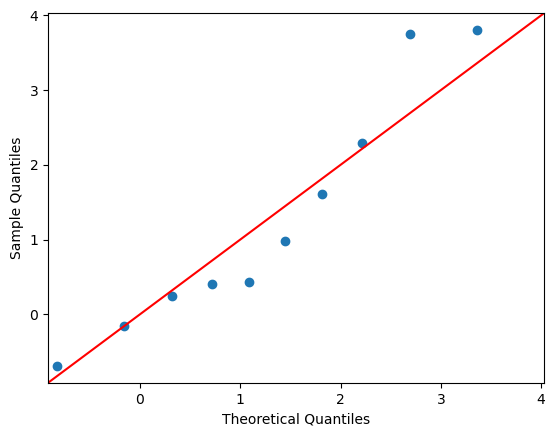

In [5]:
diff.sort_values()
sm.qqplot(diff,line='45',loc=np.mean(diff),scale=np.std(diff,ddof=1))
plt.show()

In [6]:
stats.shapiro(diff)

ShapiroResult(statistic=0.9010434150695801, pvalue=0.22494381666183472)

In [7]:
# The mean difference
mean_diff = np.mean(diff)
std_diff= np.std(diff, ddof=1)
print(mean_diff)
print(std_diff)

1.26573684496122
1.5712138525224093


In [8]:
# critical t vaue using alpha=0.05 and df=9 for a two-sided test
Ct = stats.t.ppf(0.975,9)
print(Ct)

2.2621571627409915


In [9]:
LB = mean_diff - Ct*std_diff/np.sqrt(10)
UB = mean_diff + Ct*std_diff/np.sqrt(10)
print(str(LB) + " <= population mean difference <= " + str(UB))

0.14175816483096826 <= population mean difference <= 2.389715525091472


C) Since the CI does not span 0, we can conclude there is a statistically significant difference.

Let's compare the paired test to the two-sample test results below:

In [10]:
mean_b = np.mean(B)
mean_a = np.mean(A)
std_a = np.std(A, ddof=1)
std_b = np.std(B, ddof=1)
print(mean_b - mean_a)

1.2657368449612196


In [11]:
na = nb = 10
s_p = np.sqrt((((na-1)*std_a**2)+((nb-1)*std_b**2))/(na + nb -2))
print(s_p)

5.235192207806762


In [12]:
Ct = stats.t.ppf(0.975,18)
print(Ct)

2.10092204024096


In [13]:
# Difference in means
LB = (mean_b - mean_a) - Ct*s_p/np.sqrt(20)
UB = (mean_b - mean_a) + Ct*s_p/np.sqrt(20)
print(str(LB) + " <= mu_b - mu_a <= " + str(UB))

-1.1936541049009008 <= mu_b - mu_a <= 3.72512779482334


Analyzing the results as a two-sample test the results are not statistically significant as the confidence interval crosses zero. The variability that occurs in the individual mice is NOT cancelled out as is the case in the paried test. This large variability in turn propagates to the confidence interval resulting in large bounds even though the average difference is the same for both cases!

Paired t-test calculations.  \
You can use Python and scipy states stats.t-test realted to run a paired t test

The you can find the t-statistic for the mean difference using the stanadrd errror of the differences.  This is a one sample t-test where the $\mu$ is 0 for the new set of data (the differences)

In [14]:
#Python use scipy stats.t-test related
stats.ttest_rel(A,B)

Ttest_relResult(statistic=-2.5474643964264483, pvalue=0.03132478983040782)

In [15]:
t_paired= ((mean_diff)/(std_diff/np.sqrt(10)))
print(t_paired)

2.5474643964264483


You can find the p-value here by finding the probability of finding a t-value of 2.548 using alpha = 0.05 and a two-sided test.  This is betwee n p=0.01 and p=0.025 by the table for dof=9, so double this is p=0.02 to 0.05.  The exact p-value found was p=0.031, so we can reject the null hypothesis and accept that there is indeed a difference in the mean difference.  This agrees with the CI above, which it always will.   